In [46]:
import pandas as pd
import pmdarima as pm
from sklearn.metrics import mean_absolute_percentage_error
from prophet import Prophet
import matplotlib.pyplot as plt
%store -r date_list
%store -r cpi_list
%store -r ppi_list
%store -r unemployed_ratio_list
%store -r update_sp500

In [47]:
cpi_camp = pd.DataFrame()
cpi_camp['ds'] = date_list
cpi_camp['y'] = cpi_list
cpi_camp['ds'] = pd.to_datetime(cpi_camp['ds'])
train = cpi_camp[(cpi_camp['ds'] <= '2015-08-31')]
test = cpi_camp[(cpi_camp['ds'] > '2015-08-31')]


In [48]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=len(test), freq='MS')
forecast = m.predict(future)
cpi_forecast = forecast['yhat']

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
ppi_camp = pd.DataFrame()
ppi_camp['ds'] = date_list
ppi_camp['y'] = ppi_list
ppi_camp['ds'] = pd.to_datetime(ppi_camp['ds'])
train = ppi_camp[(ppi_camp['ds'] <= '2015-08-31')]
test = ppi_camp[(ppi_camp['ds'] > '2015-08-31')]

In [50]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=len(test), freq='MS')
forecast = m.predict(future)
ppi_forecast = forecast['yhat']

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
unemployed_camp = pd.DataFrame()
unemployed_camp['ds'] = date_list
unemployed_camp['y'] = unemployed_ratio_list
unemployed_camp['ds'] = pd.to_datetime(unemployed_camp['ds'])
train = unemployed_camp[(unemployed_camp['ds'] <= '2015-08-31')]
test = unemployed_camp[(unemployed_camp['ds'] > '2015-08-31')]

In [52]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=len(test), freq='MS')
forecast = m.predict(future)
unemployed_forecast = forecast['yhat']

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:
prophet_case_sp500 = pd.DataFrame()
prophet_case_sp500['ds'] = date_list
prophet_case_sp500['cpi'] = cpi_forecast
prophet_case_sp500['ppi'] = ppi_forecast
prophet_case_sp500['unemployment_ratio'] = unemployed_forecast
prophet_case_sp500_update = pd.concat([prophet_case_sp500, update_sp500], axis=1).dropna()
prophet_case_sp500_update['ds'] = pd.to_datetime(prophet_case_sp500_update['ds'])
prophet_case_sp500_update.rename(columns={"Price": "y"}, inplace = True)

In [54]:
train=prophet_case_sp500_update[(prophet_case_sp500_update['ds'] <= '2015-08-31')]
test=prophet_case_sp500_update[(prophet_case_sp500_update['ds'] > '2015-08-31')]
m1 = Prophet(mcmc_samples=600)
m1.add_regressor('cpi')
m1.add_regressor('ppi')
m1.add_regressor('unemployment_ratio')
train.info()
m1.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 187
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ds                  188 non-null    datetime64[ns]
 1   cpi                 188 non-null    float64       
 2   ppi                 188 non-null    float64       
 3   unemployment_ratio  188 non-null    float64       
 4   y                   188 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 8.8 KB


0.09857504754093273

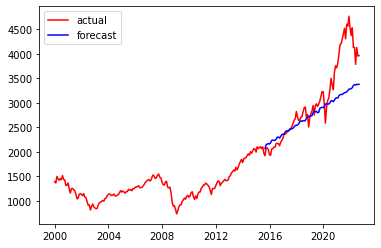

In [55]:
forecast2 = m1.predict(test)
final_df_2 = pd.concat((forecast2['yhat'], test.reset_index()), axis=1)
plt.plot(prophet_case_sp500_update['ds'], prophet_case_sp500_update['y'], color='red', label='actual')
plt.plot(final_df_2['ds'], final_df_2['yhat'], color='blue', label='forecast')
plt.legend()
mean_absolute_percentage_error(final_df_2['y'], final_df_2['yhat'])

In [57]:
data_prophet_variable = final_df_2
%store data_prophet_variable

Stored 'data_prophet_variable' (DataFrame)
